# Assignment #1 - Salary Prediction

Group 5 - Members
- Aishlee C0913045
- Ashick Rijo C0910364
- Ernie Sumoso Vicuna C0881591
- Danilo Diaz C0889539
- Yogita Sharma C0913011

We will perform a predictive analysis using most of the stages from the data analytics lifecycle (from third to last stage). We have choose a dataset that provides information about salaries in the job market based on the age, gender, education level, job title and years of experience. The salary values are what we are trying to predict using a machine learning regression algorithm.

# Dataset Description

Our dataset was acquired on Kaggle and consists on salary information about employees at different companies around the world.
Each row represents one unique employee currently working at a company on some job position. The features provided for each record are as follows:

- __Age__: age of the person in years
- __Gender__: gender of the person, both possible values are "Male" or "Female"
- __Education Level__: education level of the person, the possible values are high school, bachelor's degree, master's degree, or PhD
- __Job Title__: the person's job title, there are many possible values such as: manager, director, analyst, engineer, or administrator
- __Years of Experience__: number of years of previous work experience
- __Salary__: annual salary of the person in US dollars

Predictive variables:
- Age
- Gender
- Education Level
- Job Title
- Years of Experience

Target variable:
- Salary


# Stage 3 - Data Acquisition & Filtering

Let's start with the data acquisition and __read__ our __dataset__ from the provided file in CSV format.

In this case our __data source__ is Kaggle and will __gather data__ from this single source.

In [1]:
# import necessary libraries for the analysis lyfe-cycle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# load dataset
df = pd.read_csv('Salary_Prediction_Data.csv')

# visualize the dataset
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
# number of rows and columns of the data
df.shape

(375, 6)

As we can see, our dataset has __375 rows__ and __6 columns__ including our target variable.

Let's check our variables data types and __look for corrupted data__ that we can filter out.

In [4]:
# data types of each colummn of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
# checking for null or missing values
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [6]:
# printing the rows with corrupted data or missing values
df[df.isna().any(axis = 1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


So there are __2 rows__ with corrupted data that has __no value__ to our data analysis.

We must proceed to __eliminate or filter__ these unnecessary rows.

In [7]:
# dropping rows contain missing values (corrupted data)
df.dropna(axis = 0, how = 'any', inplace = True)

In [8]:
# checking again for null or missing values
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

As there are no more missing values,

we have succesfully __acquired__ our dataset (Salary prediction) from our data source (Kaggle) and __filter__ any corrupted data.

# Stage 4 - Data extraction

On this stage we __extract__ disparate __data__ and __transform__ it into a __usable format__ for the analysis.

In this case, we need all the data in a structured __tabular format__.

As we can see, our dataset is already in tabular format, and we do __not need to perform__ any further __extraction__ steps.

In [9]:
# Print the number of rows, columns and shape (rows, columns) of our dataset
print(f"Dataset number of rows: \t{df.shape[0]}")
print(f"Dataset number of columns: \t{df.shape[1]}")
print(f"Dataset shape (rows, columns): {df.shape}")

Dataset number of rows: 	373
Dataset number of columns: 	6
Dataset shape (rows, columns): (373, 6)


# Stage 5 - Validation and Cleansing

Now we have to __establish validation rules__ and apply them on our dataset to __remove invalid data__.

First, let's __check__ for __duplicated rows__ and __remove__ them, as these won't add value to our analysis.

In [10]:
# count the number of duplicated rows
df[df.duplicated].shape[0]

49

In [11]:
# display some of the duplicated rows
df[df.duplicated].head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0


In [12]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

df.shape

(324, 6)

After eliminating the duplicated rows we are left with 324 rows.

Let's __identify__ our __numerical__ and __categorical variables__ so we can perform different validations upon them.

In [13]:
# display columnns of our dataset
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [14]:
numerical_columns = [col for col in df.columns if df[col].dtypes!='O']
categorical_columns = [col for col in df.columns if df[col].dtypes=='O']

print("Numerical Features:   ", end = '')
print(numerical_columns)
print("Categorical Features: ", end = '')
print(categorical_columns)

Numerical Features:   ['Age', 'Years of Experience', 'Salary']
Categorical Features: ['Gender', 'Education Level', 'Job Title']


Our __numerical__ variables are:
- Age
- Years of Experience
- Salary

Meanwhile, our __categorical__ variables are:
- Gender
- Education Level
- Job Title

Now that we know our variable types, we could perform a __string validation__ on our categorical variables and a __range validation__ on our numerical variables.

In [15]:
# Unique values of our categorical variables
df[categorical_columns].apply(pd.unique)

Gender                                                [Male, Female]
Education Level                          [Bachelor's, Master's, PhD]
Job Title          [Software Engineer, Data Analyst, Senior Manag...
dtype: object

There are many unique values for our Job Title column, as we can't check each value manually we have to perform a __string validation__ on our 3 categorical variables by __deleting leading and tailing white spaces__.

In [16]:
# Apply strip to all our categorical columns
for column in categorical_columns:
    df[column] = df[column].str.strip()

Now let's check the __unique values__ for our __numerical variables__.

In [17]:
# Unique values of our categorical variables
df[numerical_columns].apply(pd.unique)

Age                    [32.0, 28.0, 45.0, 36.0, 52.0, 29.0, 42.0, 31....
Years of Experience    [5.0, 3.0, 15.0, 7.0, 20.0, 2.0, 12.0, 4.0, 1....
Salary                 [90000.0, 65000.0, 150000.0, 60000.0, 200000.0...
dtype: object

There are quite a few invalid values for our numerical variables.

Let's perform a __range validation__ to __delete negative values__ on any column or __delete zero values__ in the Age or Salary columns.

In [18]:
for column in numerical_columns:
    if column in ['Age', 'Salary']:
        df.drop(df[df[column] <= 0].index, inplace=True)
    else:
        df.drop(df[df[column] < 0].index, inplace=True)
        
df.shape

(324, 6)

Now we will __check__ our columns __data types__ one more time to make sure they have the correct data types.

In [19]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

Age and Salary columns have a float data type.

We can convert both into integer columns to reduce complexity.

- Age decimals: months or days
- Salary decimals: cents differences on the salaries

Given both contexts, eliminating decimals on these columns will not imply a significant difference in our analysis results.

Finally we convert both columns into integer data types.

In [20]:
df[['Age', 'Salary']] = df[['Age', 'Salary']].astype(int)

df.dtypes

Age                      int32
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                   int32
dtype: object

# Stage 6 - Data aggregation & Representation

With our data validated and cleaned we can proceed to __integrate__ our datasets together into a __unified view__

However, we are working with only __one dataset__ gathered from a single source (Kaggle).

So there is no need to perform further aggregation or representation steps.

If we had two or more datasets we would have to integrate them together into a single unified view using a common field among the different datasets.

# Stage 7 - Data Analysis

Let's start with our data analysis to __predict__ the __salary__ value based on our predictive variables.

Remember that our target variable is the Salary column. So we can start finding and deleting outliers that could affect our desired regression model.

To find outliers we can __plot__ our variable __values and distributions__.

In [21]:
# viewing statistical information about our dataset (only numerical values)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,324.0,37.382716,7.185844,23.0,31.0,36.5,44.0,53.0
Years of Experience,324.0,10.058642,6.650470,0.0,4.0,9.0,16.0,25.0
Salary,324.0,99985.648148,48652.271440,350.0,55000.0,95000.0,140000.0,250000.0


<Axes: xlabel='Years of Experience', ylabel='Salary'>

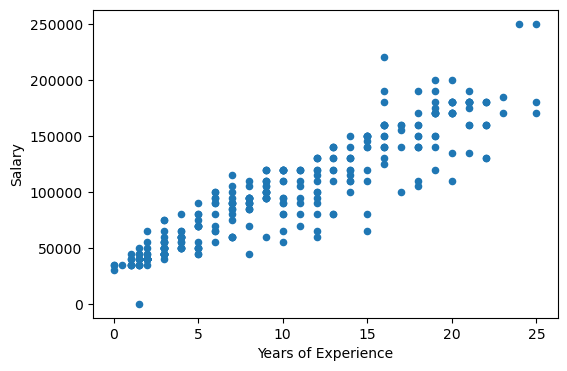

In [22]:
# Scatter plot of Years of experience (X) vs Salary (Y)
df.plot.scatter(x='Years of Experience', y='Salary', figsize=(6,4))

<Axes: xlabel='Age', ylabel='Salary'>

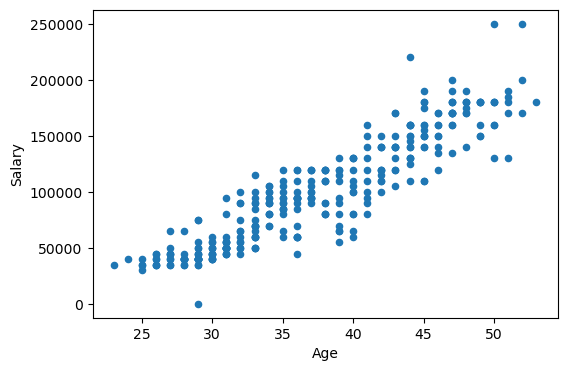

In [23]:
# Scatter plot of Age (X) vs Salary (Y)
df.plot.scatter(x='Age', y='Salary', figsize=(6,4)) 

<Axes: xlabel='Gender', ylabel='Salary'>

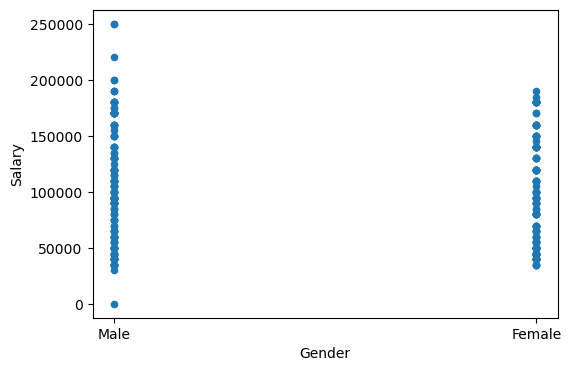

In [24]:
# Scatter plot of Gender (X) vs Salary (Y)
df.plot.scatter(x='Gender', y='Salary', figsize=(6,4)) 

<Axes: xlabel='Education Level', ylabel='Salary'>

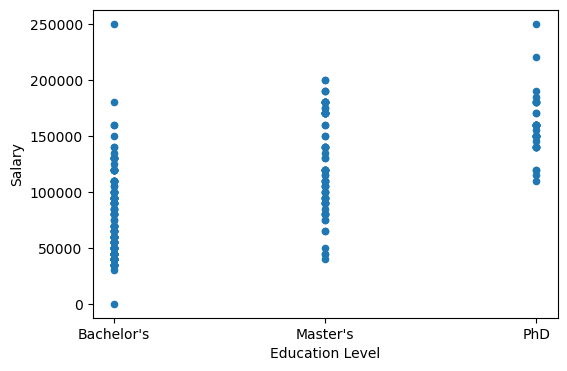

In [25]:
# Scatter plot of Education Level (X) vs Salary (Y)
df.plot.scatter(x='Education Level', y='Salary', figsize=(6,4)) 

<Axes: xlabel='Job Title', ylabel='Salary'>

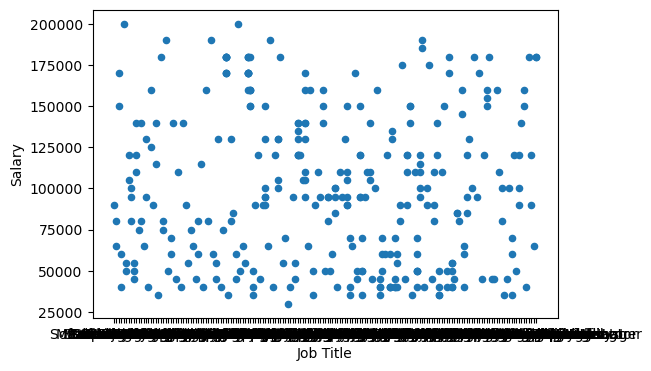

In [37]:
# Scatter plot of Job Title (X) vs Salary (Y)
df.plot.scatter(x='Job Title', y='Salary', figsize=(6,4))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years of Experience'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >]], dtype=object)

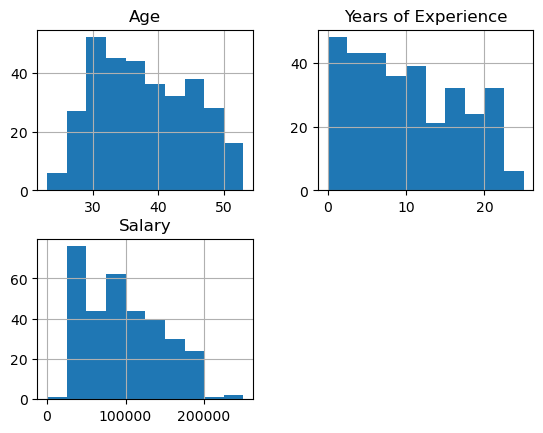

In [27]:
# display histograms for all numerical variables
df.hist()

In [28]:
# Right outliers, with salaries over $200,000 annually
df[df['Salary'] > 200000].sort_values(by = 'Salary', ascending = False)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
30,50,Male,Bachelor's,CEO,25.0,250000
83,52,Male,PhD,Chief Technology Officer,24.0,250000
105,44,Male,PhD,Chief Data Officer,16.0,220000


In [29]:
# Left outliers, with salaries less than $30,000 annually
df[df['Salary'] < 30000].sort_values(by = 'Salary', ascending = False)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
259,29,Male,Bachelor's,Junior Business Operations Analyst,1.5,350


As we have identified __4__ total __outliers__ on the __Salary column__

- 3 outliers with salaries over $200,000 annually

- 1 outlier with salary below $30,000 annually

We will proceed to __delete__ these __extreme values__ on our dataset.

In [30]:
# Deleting outliers on the Salary column
df.drop(df[df['Salary'] > 200000].index, inplace=True)
df.drop(df[df['Salary'] < 30000].index, inplace=True)

df.shape

(320, 6)

Now we have to __split__ our __dataset__ into:
- __X__: predictive features
- __Y__: target feature

In [31]:
# Separate features (X) and target (y)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

As we have splitted our data, we have to apply a __standard scaling__ to our __numerical variables__

Our __predictive numerical columns__ are:
    
- Age
- Years of Experience

Let's apply a __standard scaling__ to both of them.

In [32]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler
scaler = StandardScaler()

# Select the first and fifth columns 
columns_to_scale = [0, 4]

# Fit and transform the selected columns in X
x[:, columns_to_scale] = scaler.fit_transform(x[:, columns_to_scale])

# Now, the first and fifth columns in X are standardized
df_x = pd.DataFrame(x)
df_x

,0,1,2,3,4
0,-0.745571,Male,Bachelor's,Software Engineer,-0.758986
1,-1.307934,Female,Master's,Data Analyst,-1.06401
2,1.08211,Male,PhD,Senior Manager,0.766135
3,-0.183207,Female,Bachelor's,Sales Associate,-0.453962
4,2.066246,Male,Master's,Director,1.528695
...,...,...,...,...,...
315,-1.307934,Female,Bachelor's,Junior Operations Manager,-1.369034
316,-0.183207,Male,Bachelor's,Senior Business Development Manager,-0.30145
317,0.941519,Female,PhD,Senior Data Scientist,0.918647
318,-0.886162,Male,Bachelor's,Junior Marketing Coordinator,-1.06401


As we can see our numerical values have been standarized.

Now the __mean__ will become a value of __zero__.

Then, each __unit variance__ from the mean will add or subtract __one__ from the new standarized value.

Now we can apply a __One Hot Encoding__ technique to our __categorical variables__ to turn them into __numerical variables__.

Our __predictive categorical columns__ are:
    
- Gender
- Education Level
- Job Title

Let's apply a __One Hot Encoding__ only on the first 2.

In [36]:
# Perform one-hot encoding on Gender and Education Level
columns_to_encode = [1, 2]
x = pd.get_dummies(pd.DataFrame(x), columns=columns_to_encode)

# Now, x contains the one-hot encoded columns
df_x = pd.DataFrame(x)
df_x

,0,3,4,1_Female,1_Male,2_Bachelor's,2_Master's,2_PhD
0,-0.745571,Software Engineer,-0.758986,0,1,1,0,0
1,-1.307934,Data Analyst,-1.06401,1,0,0,1,0
2,1.08211,Senior Manager,0.766135,0,1,0,0,1
3,-0.183207,Sales Associate,-0.453962,1,0,1,0,0
4,2.066246,Director,1.528695,0,1,0,1,0
...,...,...,...,...,...,...,...,...
315,-1.307934,Junior Operations Manager,-1.369034,1,0,1,0,0
316,-0.183207,Senior Business Development Manager,-0.30145,0,1,1,0,0
317,0.941519,Senior Data Scientist,0.918647,1,0,0,0,1
318,-0.886162,Junior Marketing Coordinator,-1.06401,0,1,1,0,0


As of our __Job Title__ column, using a scatter plot we can deduct that __both variables__ (Salary and Job Title) __are not correlated__ as the values are distributed accross most job titles, not following a linear behaviour.

So in this analysis we have decided to __drop__ this column, as it won't help our regression model.

<Axes: xlabel='Job Title', ylabel='Salary'>

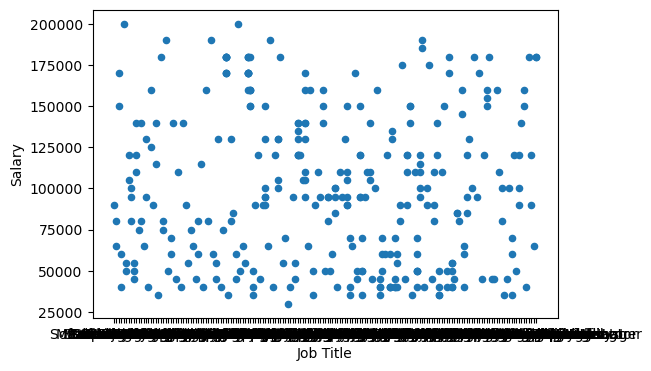

In [38]:
# Scatter plot of Job Title (X) vs Salary (Y)
df.plot.scatter(x='Job Title', y='Salary', figsize=(6,4))

In [44]:
# drop the Job Title column from our dataset
df_x.drop(3, axis=1, inplace=True)
df_x

,0,4,1_Female,1_Male,2_Bachelor's,2_Master's,2_PhD
0,-0.745571,-0.758986,0,1,1,0,0
1,-1.307934,-1.06401,1,0,0,1,0
2,1.08211,0.766135,0,1,0,0,1
3,-0.183207,-0.453962,1,0,1,0,0
4,2.066246,1.528695,0,1,0,1,0
...,...,...,...,...,...,...,...
315,-1.307934,-1.369034,1,0,1,0,0
316,-0.183207,-0.30145,0,1,1,0,0
317,0.941519,0.918647,1,0,0,0,1
318,-0.886162,-1.06401,0,1,1,0,0


Our columns are scaled and encoded, this means we are ready to build our model to predict salary values.

But first, let's make sure our columns have remain with the correct data types.

In [53]:
# check and correct data types
print(df_x.dtypes)

# cast our standarized numerical values as floats
df_x[[0, 4]] = df_x[[0, 4]].astype(float) 

df_x.dtypes

0               float64
4               float64
1_Female          uint8
1_Male            uint8
2_Bachelor's      uint8
2_Master's        uint8
2_PhD             uint8
dtype: object


0               float64
4               float64
1_Female          uint8
1_Male            uint8
2_Bachelor's      uint8
2_Master's        uint8
2_PhD             uint8
dtype: object

Now we can __visualize__ a __heatmap__ to find the __correlation between all variables__.

<Axes: >

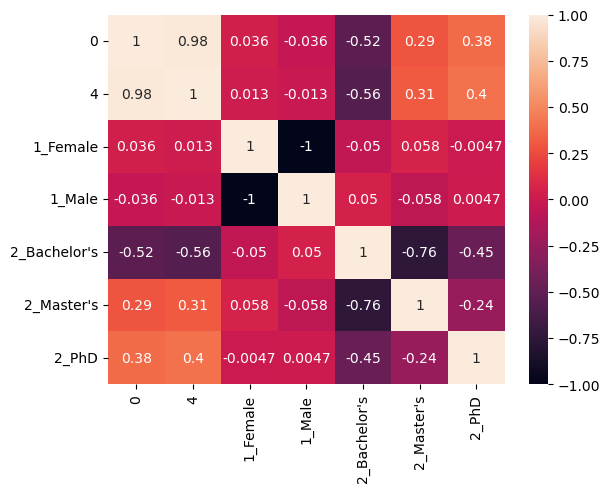

In [54]:
# using heatmap to visualize the correlation matrix

corr_matrix = df_x.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot = True)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Perform label encoding on the 2nd column (Column2)
# label_encoder = LabelEncoder()
# x['Education Level'] = label_encoder.fit_transform(x['Education Level'])

# # Now, the 2nd column of x is label-encoded
# print(x)

### Multiple Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

# creating an instance of the class linear regression, which will represent the regression model and fit it
model = LinearRegression()
model.fit(x_train, y_train)

In [ ]:
# Predicting the testing result

y_pred = model.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import r2_score

# r2 score
r2_score(y_test, y_pred)

In [ ]:
from sklearn import metrics

# calculating MAE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

# calculating MSE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))

# calculating RMSE
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# create decision tree classifier object
clf = DecisionTreeClassifier()

# train decision tree classifier
clf.fit(x_train, y_train)

# predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
# Model Accuracy, how often is the classifier correct ? 

from sklearn.metrics import accuracy_score

print("Accuracy:", metrics.accuracy_score(y_test, y_pred).round(2))

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, zero_division=1)

# Print the classification report
print(report)

In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index = x.columns).sort_values(ascending = False)
feature_imp

### SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel = 'linear')

svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
svm_classifier = SVC(kernel = 'rbf', gamma = 'auto')

svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
svm_classifier = SVC(kernel = 'sigmoid')

svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred).round(2))

In [ ]:
svm_classifier = SVC(kernel = 'poly', degree = 5)

svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# References

- Salary Prediction Dataset

https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer

- Building a performing Machine Learning model

https://www.slideshare.net/CharlesVestur/building-a-performing-machine-learning-model-from-a-to-z

- Employee Salary Prediction (Best ML Algorithms)

https://www.kaggle.com/code/yasserh/employee-salaray-prediction-best-ml-algorithms